<p align="right">
    <img src="Zewail-City.png">
</p>


---

# Machine Learning Lab #4 


In [1]:
# import Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

/home/hazem/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Load

In [2]:
# Read the Data
df = pd.read_csv("dataset.csv")

### Initial Data Overview

In [3]:
# Data head
df.head()

,age,income,gender,education_level,marital_status,purchases_last_month,website_visits,account_age_months,satisfaction_score,churn
0,56.0,NaN,Male,PhD,Divorced,3.0,8.0,22,1.51,0
1,69.0,92580.192067,Male,High School,Married,NaN,11.0,235,NaN,0
2,46.0,63227.158493,Male,Bachelor,Married,4.0,8.0,86,4.59,0
3,32.0,52104.048742,Male,Bachelor,Divorced,NaN,8.0,170,2.36,0
4,60.0,49529.112374,Male,Master,NaN,9.0,12.0,214,4.93,0


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   3520 non-null   float64
 1   income                3280 non-null   float64
 2   gender                3600 non-null   object 
 3   education_level       3400 non-null   object 
 4   marital_status        3520 non-null   object 
 5   purchases_last_month  3200 non-null   float64
 6   website_visits        3400 non-null   float64
 7   account_age_months    4000 non-null   int64  
 8   satisfaction_score    3600 non-null   float64
 9   churn                 4000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 312.6+ KB


In [5]:
# Null counts
print("null counts:")
df.isnull().sum()

null counts:


age                     480
income                  720
gender                  400
education_level         600
marital_status          480
purchases_last_month    800
website_visits          600
account_age_months        0
satisfaction_score      400
churn                     0
dtype: int64

In [6]:
# Data statistical summary
df.describe(include="all")

,age,income,gender,education_level,marital_status,purchases_last_month,website_visits,account_age_months,satisfaction_score,churn
count,3520.000000,3280.000000,3600,3400,3520,3200.000000,3400.000000,4000.000000,3600.000000,4000.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,Bachelor,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1823,870,1203,NaN,NaN,NaN,NaN,NaN
mean,43.895455,65401.734912,NaN,NaN,NaN,4.355625,11.229706,120.302750,2.999847,0.101000
std,14.902463,42852.987879,NaN,NaN,NaN,4.362351,13.802132,68.858881,1.155183,0.301366
min,18.000000,-6790.003565,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,0.000000
25%,31.000000,46986.189180,NaN,NaN,NaN,3.000000,8.000000,61.000000,1.987500,0.000000
50%,44.000000,60691.452835,NaN,NaN,NaN,4.000000,10.000000,120.000000,3.010000,0.000000
75%,57.000000,75106.063458,NaN,NaN,NaN,5.000000,12.000000,180.000000,3.990000,0.000000


---

### Visualize Column Distribution

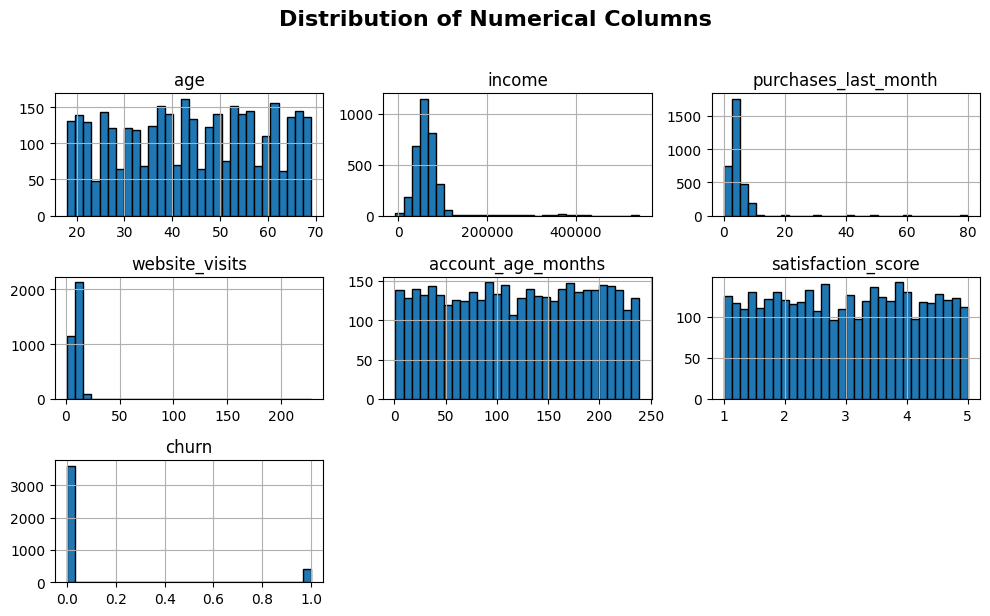

In [7]:
# Histograms for numerical columns

# config
figsize=(10, 6)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
# Plot all numerical columns in one line
df[numerical_cols].hist(bins=30, figsize=figsize, layout=(-1, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

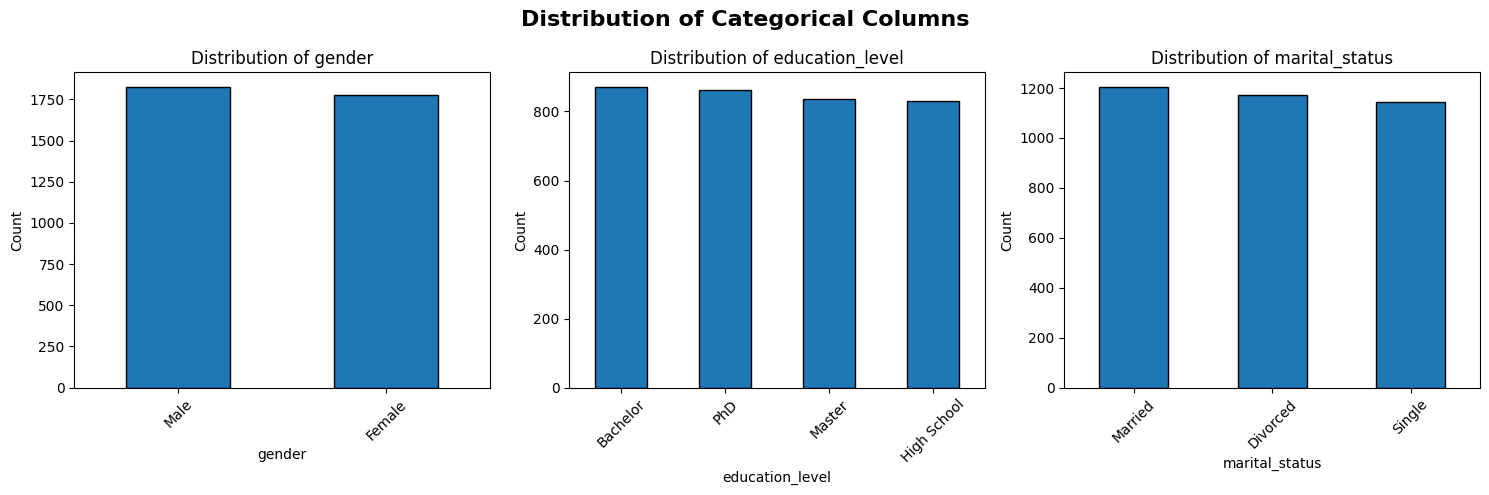

In [8]:
# Barplot for categorical column

# Categorical columns
categorical_cols = ['gender', 'education_level', 'marital_status']

# Plot categorical column distributions
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 5))

for ax, col in zip(axes, categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Categorical Columns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---

### Handle Missing Data

In [9]:
# Numeric columns by median
for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value)

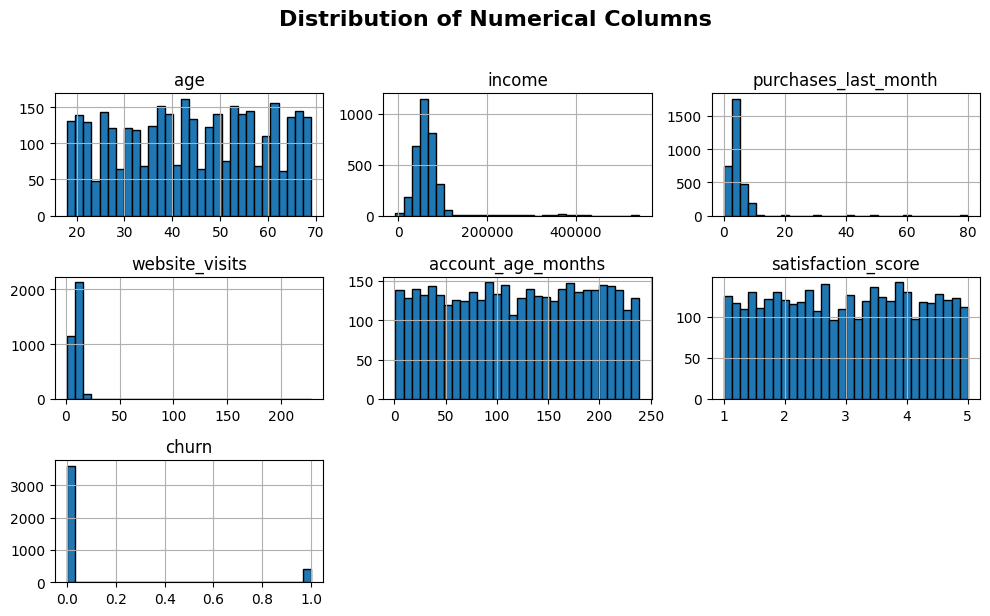

In [10]:
# Histograms for numerical columns

# config
figsize=(10, 6)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
# Plot all numerical columns in one line
df[numerical_cols].hist(bins=30, figsize=figsize, layout=(-1, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Mean imputation
df_mean = df.copy()

for col in numerical_cols:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())
    
# Median imputation
df_median = df.copy()

for col in numerical_cols:
    df_median[col] = df_median[col].fillna(df_median[col].median())

# KNN imputation
df_knn = df.copy()

imputer = KNNImputer(n_neighbors=5)
df_knn[numerical_cols] = imputer.fit_transform(df_knn[numerical_cols])

# MICE (Iterative Imputer)
df_mice = df.copy()

imp = IterativeImputer()
df_mice[numerical_cols] = imp.fit_transform(df_mice[numerical_cols])

In [12]:
std_summary = pd.DataFrame({
    'Original STD': df[numerical_cols].std(),
    'Mean Imputed': df_mean[numerical_cols].std(),
    'Median Imputed': df_median[numerical_cols].std(),
    'KNN Imputed': df_knn[numerical_cols].std(),
    'MICE Imputed': df_mice[numerical_cols].std()
}).T

std_summary

,age,income,purchases_last_month,website_visits,account_age_months,satisfaction_score,churn
Original STD,14.902463,42852.987879,4.362351,13.802132,68.858881,1.155183,0.301366
Mean Imputed,13.979511,38803.965903,3.901683,12.724656,68.858881,1.095888,0.301366
Median Imputed,13.979553,38846.149797,3.904276,12.732232,68.858881,1.095892,0.301366
KNN Imputed,14.179013,39327.523958,3.996010,12.857005,68.858881,1.107249,0.301366
MICE Imputed,13.979607,40659.701160,4.031224,13.164459,68.858881,1.095899,0.301366


> **KNN and MICE Methods are better**

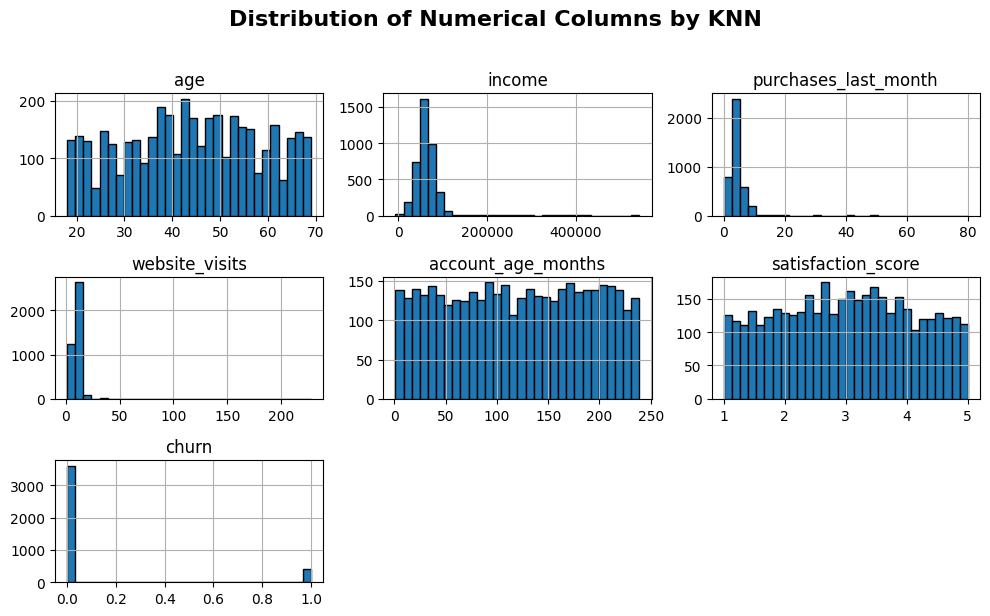

In [13]:
# Plot all numerical columns in KNN
df_knn[numerical_cols].hist(bins=30, figsize=figsize, layout=(-1, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns by KNN', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

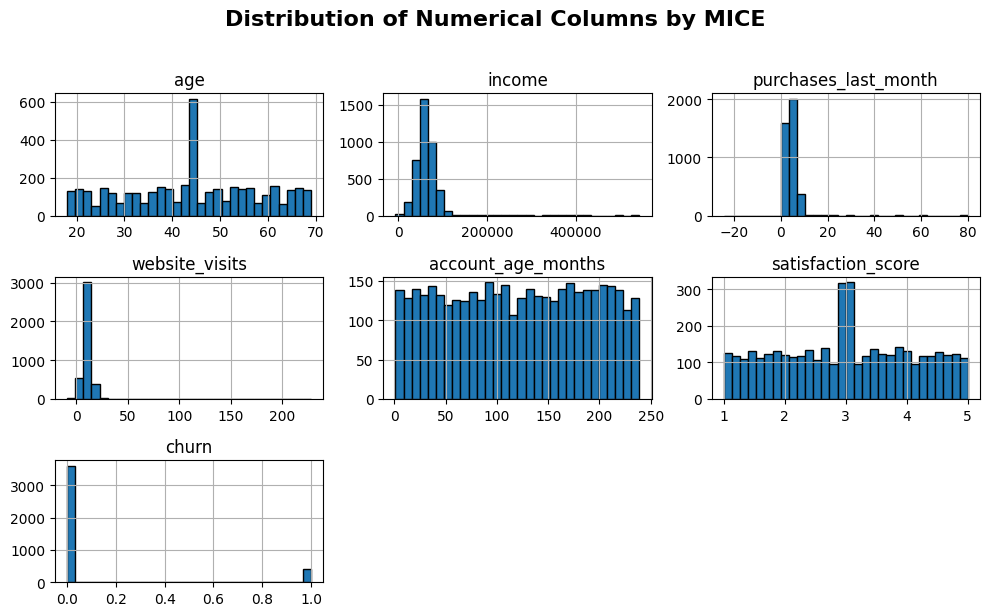

In [14]:
# Plot all numerical columns in MICE
df_mice[numerical_cols].hist(bins=30, figsize=figsize, layout=(-1, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Columns by MICE', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

### Categorical Data Encoding

In [15]:
# One-hot encode all categorical columns at once
df_encoded = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

In [16]:
# Final dataset: numerical + encoded categorical
df_final = pd.concat([df_knn[numerical_cols], df_encoded], axis=1)

df_final.head()

,age,income,purchases_last_month,website_visits,account_age_months,satisfaction_score,churn,gender_Female,gender_Male,education_level_Bachelor,education_level_High School,education_level_Master,education_level_PhD,marital_status_Divorced,marital_status_Married,marital_status_Single
0,56.0,54805.949789,3.0,8.0,22.0,1.510,0.0,False,True,False,False,False,True,True,False,False
1,69.0,92580.192067,2.8,11.0,235.0,3.966,0.0,False,True,False,True,False,False,False,True,False
2,46.0,63227.158493,4.0,8.0,86.0,4.590,0.0,False,True,True,False,False,False,False,True,False
3,32.0,52104.048742,9.6,8.0,170.0,2.360,0.0,False,True,True,False,False,False,True,False,False
4,60.0,49529.112374,9.0,12.0,214.0,4.930,0.0,False,True,False,False,True,False,False,False,False


---

### Outliers Detection and Visualization

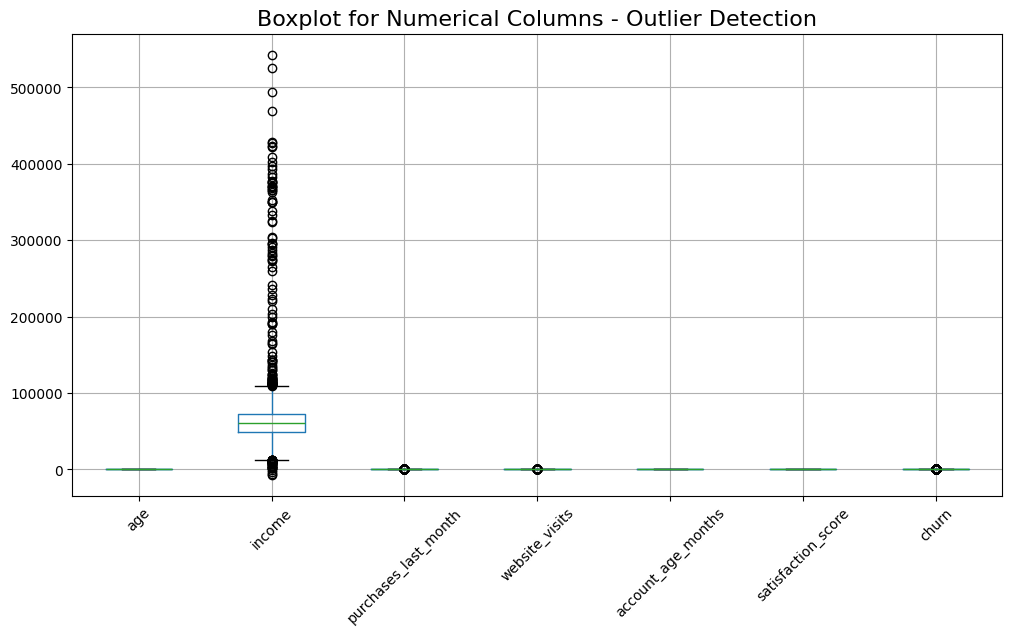

In [17]:
plt.figure(figsize=(12,6))
df_final[numerical_cols].boxplot()
plt.title("Boxplot for Numerical Columns - Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.show()

> The outliers appear in **Income coulmn**  values however it is OK to have a huge variation in income 
**you can give credits to Capitalism**.
> Therefore, No need for **droping**.

---

### Standardization

In [18]:
# Standardization (Z_score) [SVM, Logistic, KNN, PCA]

df_standardized = df_final.copy().drop('churn', axis=1)
df_standardized[numerical_cols] = StandardScaler().fit_transform(df_final[numerical_cols])

# Normalization (0:1) [Neural networks, distance-based models]
df_normalized = df_final.copy()
df_normalized[numerical_cols] = MinMaxScaler().fit_transform(df_final[numerical_cols])

In [19]:
df_standardized.head()

,age,income,purchases_last_month,website_visits,account_age_months,satisfaction_score,gender_Female,gender_Male,education_level_Bachelor,education_level_High School,education_level_Master,education_level_PhD,marital_status_Divorced,marital_status_Married,marital_status_Single,churn
0,0.853932,-0.257652,-0.346777,-0.244952,-1.427776,-1.349646,False,True,False,False,False,True,True,False,False,-0.335182
1,1.770895,0.702972,-0.396833,-0.011587,1.665894,0.868741,False,True,False,True,False,False,False,True,False,-0.335182
2,0.148576,-0.043495,-0.096496,-0.244952,-0.498222,1.432370,False,True,True,False,False,False,False,True,False,-0.335182
3,-0.838922,-0.326363,1.305077,-0.244952,0.721816,-0.581882,False,True,True,False,False,False,True,False,False,-0.335182
4,1.136074,-0.391845,1.154909,0.066202,1.360884,1.739476,False,True,False,False,True,False,False,False,False,-0.335182


---

### Split Dataset

In [20]:
# Supposing final features and target
X = df_standardized.drop('churn', axis=1)  # features
y = df_final['churn']               # label

In [21]:
# First split: Train + Temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [22]:
# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (2800, 15)
y_train: (2800,)
X_val: (600, 15)
y_val: (600,)
X_test: (600, 15)
y_test: (600,)


---